In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:
url = 'https://drive.google.com/file/d/1Yx_DYY6a_S2xEomiAj38eGuro05XcoEI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
categories_df = pd.read_csv(path)
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          53231 non-null  int64  
 1   product_quantity  53231 non-null  int64  
 2   sku               53231 non-null  object 
 3   unit_price        53231 non-null  float64
 4   date              53231 non-null  object 
 5   name              53231 non-null  object 
 6   desc              53231 non-null  object 
 7   price             53231 non-null  float64
 8   type              52904 non-null  float64
 9   discount          53231 non-null  float64
 10  product_category  53231 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
categories_df['date'] = pd.to_datetime(categories_df['date'])
categories_df['type'] = pd.to_numeric(categories_df['type']).astype('Int64')
categories_df.info()
categories_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  datetime64[ns]
 5   name              53231 non-null  object        
 6   desc              53231 non-null  object        
 7   price             53231 non-null  float64       
 8   type              52904 non-null  Int64         
 9   discount          53231 non-null  float64       
 10  product_category  53231 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 4.5+ MB


In [ ]:
len(categories_df['product_category'].unique())

40

In [ ]:
categories_df["month"] = categories_df["date"].dt.month.apply(lambda x: f"{x:02d}")
categories_df["year"] = categories_df["date"].dt.year
categories_df.info()
categories_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  datetime64[ns]
 5   name              53231 non-null  object        
 6   desc              53231 non-null  object        
 7   price             53231 non-null  float64       
 8   type              52904 non-null  Int64         
 9   discount          53231 non-null  float64       
 10  product_category  53231 non-null  object        
 11  month             53231 non-null  object        
 12  year              53231 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,01,2017
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,01,2017
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,01,2017
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,01,2017
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018


In [ ]:
categories_df['discount %'] = categories_df['discount'] / categories_df['price'] * 100
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year,year_month,discount %
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,01,2017,2017-01,22.134776
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,01,2017,2017-01,17.254902
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,01,2017,2017-01,18.887640
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,01,2017,2017-01,20.898818
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,01,2017,2017-01,52.501750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018,2018-03,60.040000
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018,2018-03,60.040000
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018,2018-03,60.040000
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,03,2018,2018-03,60.040000


In [ ]:
####### Are there seasonal patterns in the evolution of sales?

categories_df['year_month'] = categories_df['year'].astype(str) + "-" + categories_df['month'].astype(str)
monthly_sales_df = categories_df.groupby(["year_month", "product_category"]).agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum", "price": "sum", "discount %" : "mean"})
monthly_sales_df.reset_index(inplace=True)
monthly_sales_df

,year_month,product_category,unit_price,product_quantity,discount,price,discount %
0,2017-01,Adapters & Hubs,7398.58,149,2434.89,9833.47,30.741797
1,2017-01,Apple Care,7837.56,109,2375.44,10213.00,23.525561
2,2017-01,Apple TV,2088.07,12,109.93,2198.00,5.016136
3,2017-01,Apple Watch,8829.60,19,81.40,8911.00,0.913478
4,2017-01,Apple Watch Accessories,1792.37,52,522.89,2315.26,24.458269
...,...,...,...,...,...,...,...
580,2018-03,Screen protector for Apple Watch,40.96,4,26.00,66.96,38.259346
581,2018-03,Stands & Supports,1307.79,31,289.77,1597.56,25.339437
582,2018-03,Tools & Toolkits,611.00,30,88.59,699.59,18.899831
583,2018-03,Wacom Tablets,4259.99,23,666.23,4926.22,13.571141


In [ ]:
monthly_sales_df.groupby('product_category')['unit_price'].sum().sort_values(ascending=False)

product_category
IPhone                              1075867.18
Hard Drives                          983433.86
Monitors                             578574.33
SSD Expansion Kits                   553039.44
Other                                532215.81
NAS                                  452907.80
Memory (RAM) for Mac Computers       341900.01
IPad                                 306143.65
Headsets & Headphones                246900.13
Wacom Tablets                        231472.45
Apple Watch                          209800.87
Apple Watch Accessories              201190.46
Phone Cases/Covers                   130949.37
Portable Speakers                    130614.64
Hard Drives Accessories              124681.78
Macs & Imac                          110796.14
Charger                              104162.21
Adapters & Hubs                      101934.63
Keyboards                            100597.38
Batteries                             91879.55
Open - Accessories & Gadgets          91033

In [ ]:
monthly_sales_df.groupby('year_month')['unit_price'].sum()

year_month
2017-01     568276.87
2017-02     300168.04
2017-03      22882.72
2017-04     210476.09
2017-05     290131.55
2017-06     256519.25
2017-07     563693.39
2017-08     348786.89
2017-09     362829.48
2017-10     503210.00
2017-11    1378320.05
2017-12     925728.20
2018-01     791215.90
2018-02     489606.64
2018-03     200151.79
Name: unit_price, dtype: float64

In [ ]:
# which are the top 10 most sold product categories?
top_10 = categories_df.groupby('product_category').sum().nlargest(10, 'unit_price')
top_10

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3285009010.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10 = categories_df.groupby('product_category').sum().nlargest(10, 'unit_price')


,id_order,product_quantity,unit_price,price,type,discount,year,discount %
product_category,,,,,,,,
IPhone,844504561,2057,1075867.18,1175293.44,123578242296,99426.26,4046378,19725.533762
Hard Drives,2674630436,8075,983433.86,1177755.17,106331585908,194321.31,13240827,121502.081774
Monitors,620744186,1722,578574.33,658293.91,1929744,79719.58,3003659,17507.810464
SSD Expansion Kits,1106140689,3051,553039.44,666022.75,24211929985,112983.31,5424287,42553.422149
Other,1741043489,4763,532215.81,683248.86,49179864905,151033.05,8363466,80004.586785
NAS,459368011,1114,452907.80,495632.31,13307708921,42724.51,2204791,8556.524079
Memory (RAM) for Mac Computers,1256825089,3822,341900.01,407051.21,4277504,65151.20,6325858,43627.797391
IPad,217748251,539,306143.65,327971.55,23869614140,21827.90,1028775,3203.212793
Headsets & Headphones,1001485906,2541,246900.13,315898.94,12485496,68998.81,4677883,66823.020628


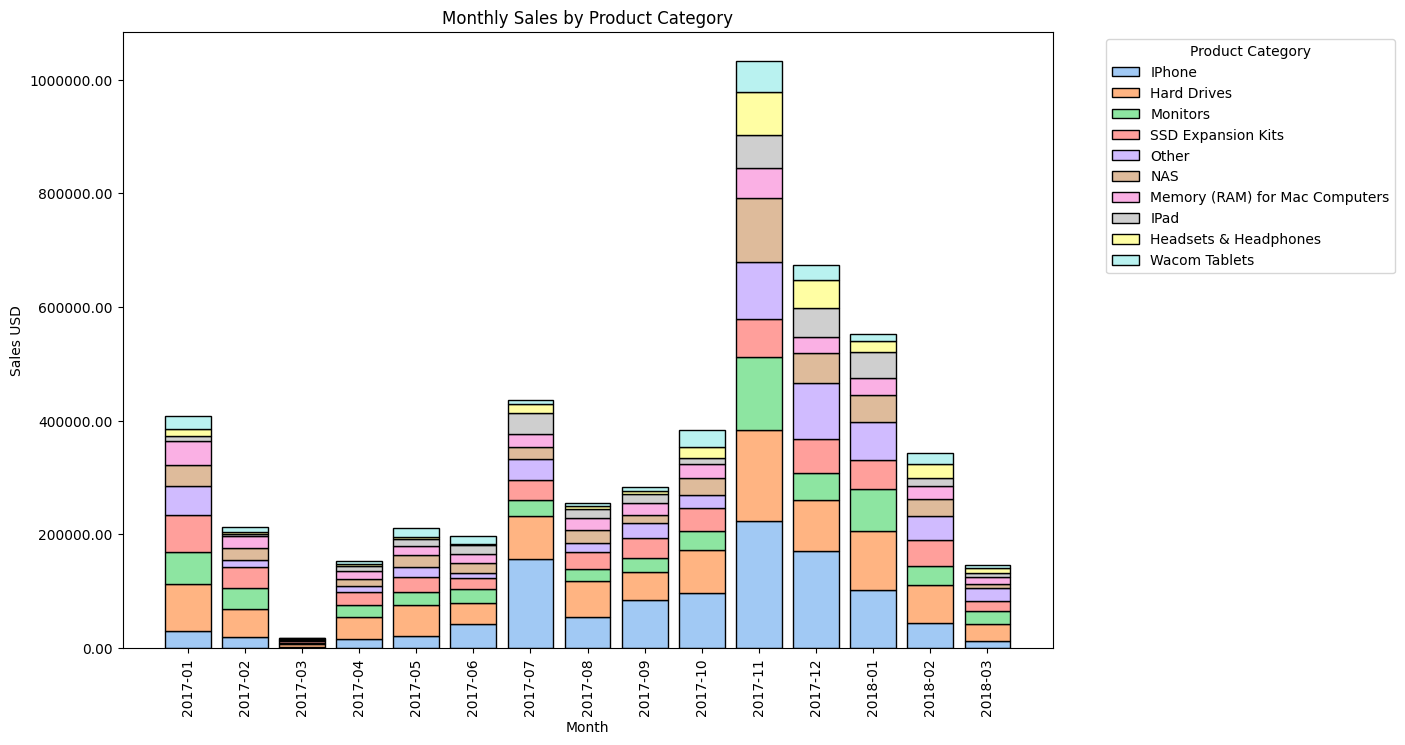

In [ ]:

# Define category labels and values
# categories = monthly_sales_df["product_category"].unique()
categories = top_10.index
months = monthly_sales_df["year_month"].unique()
colors = sns.color_palette("pastel", n_colors=len(categories))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Bottom array to keep track of where each segment starts
bottom = np.zeros(len(months))

# Loop through each category and add a segment to the bar
for idx, category in enumerate(categories):
    monthly_category_sales = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["unit_price"]
    ax.bar(months, monthly_category_sales, label=category, bottom=bottom, color=colors[idx], edgecolor='black')
    bottom += monthly_category_sales.values  # Update bottom position for next segment

# Add labels and title
ax.set_xlabel("Month")
ax.set_xticks(months)
ax.set_xticklabels(months, rotation=90)
ax.set_ylabel("Sales USD")
ax.set_title("Monthly Sales by Product Category")
ax.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display full float values on the y axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.show()

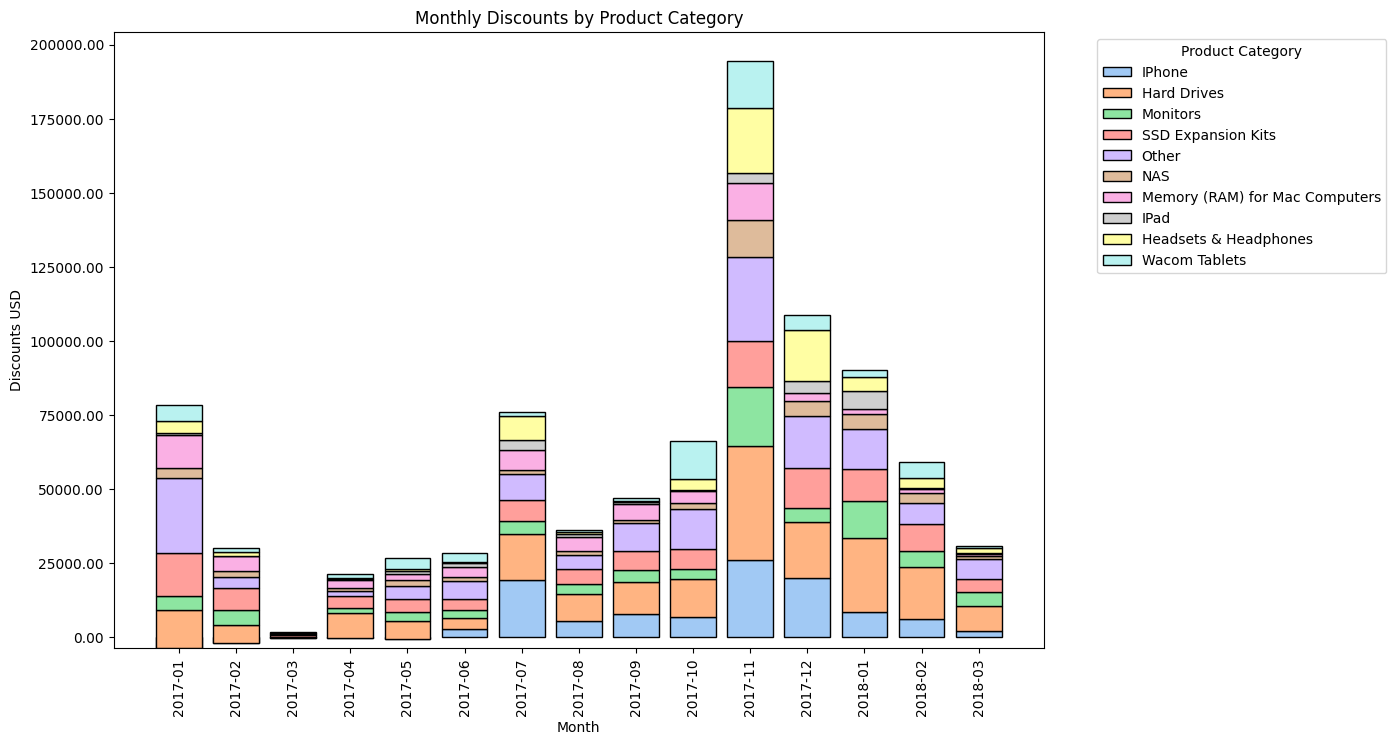

In [ ]:
# Define category labels and values
# categories = monthly_sales_df["product_category"].unique()
categories = top_10.index
months = monthly_sales_df["year_month"].unique()
colors = sns.color_palette("pastel", n_colors=len(categories))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Bottom array to keep track of where each segment starts
bottom = np.zeros(len(months))

# Loop through each category and add a segment to the bar
for idx, category in enumerate(categories):
    monthly_category_sales = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["discount"]
    ax.bar(months, monthly_category_sales, label=category, bottom=bottom, color=colors[idx], edgecolor='black')
    bottom += monthly_category_sales.values  # Update bottom position for next segment

# Add labels and title
ax.set_xlabel("Month")
ax.set_xticks(months)
ax.set_xticklabels(months, rotation=90)
ax.set_ylabel("Discounts USD")
ax.set_title("Monthly Discounts by Product Category")
ax.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display full float values on the y axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.show()

In [ ]:
categories = top_10.index[0]
categories

'IPhone'

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/1465731764.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=size_font);
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/1465731764.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=size_font);
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/1465731764.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=size_font);
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/1465731764.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

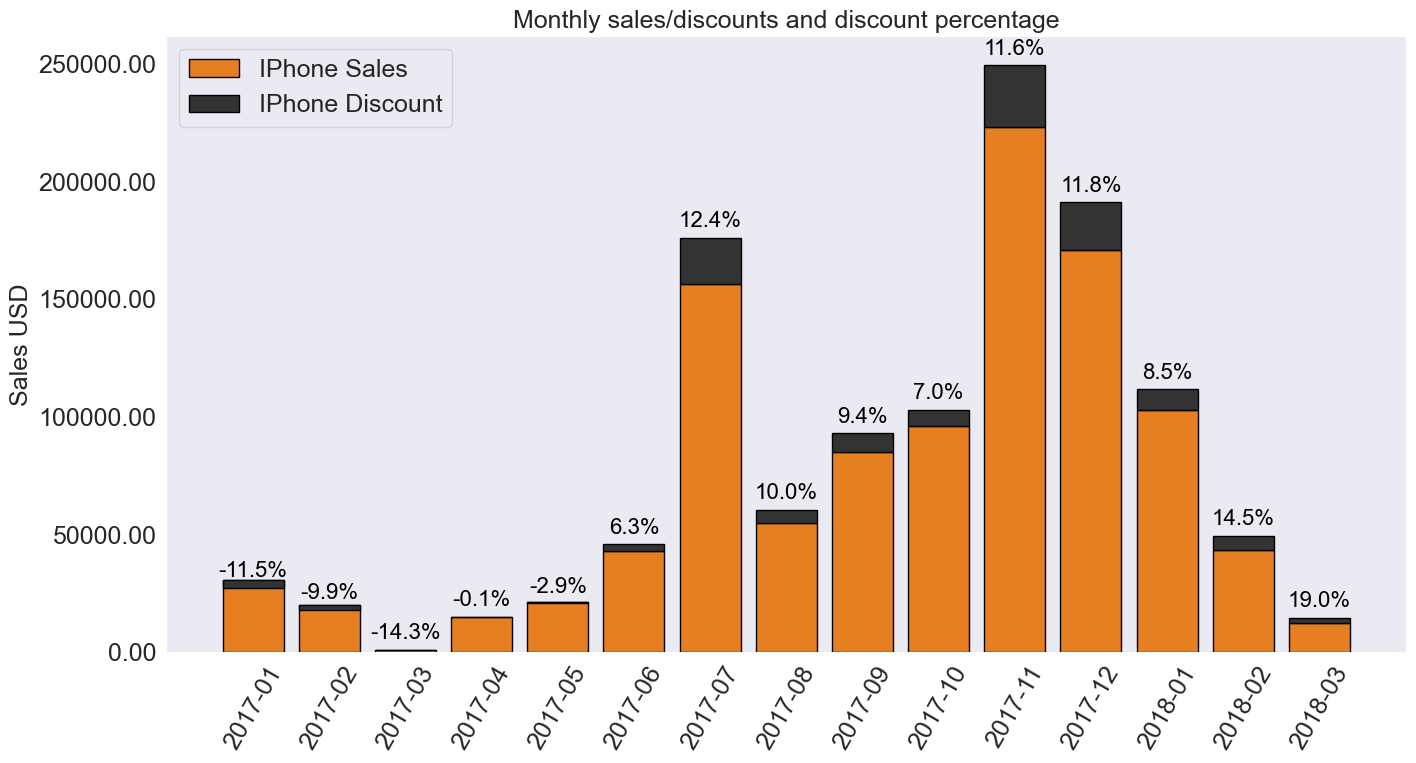

In [ ]:
# Define category labels and values
categories = [top_10.index[0]]
months = monthly_sales_df["year_month"].unique()
colors = sns.color_palette("pastel", n_colors=len(categories))
size_font = 18
size_font_percentage = 16

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Bottom array to keep track of where each segment starts
bottom = np.zeros(len(months))

# Loop through each category and add a segment to the bar
# Define specific colors for sales and discounts
sales_color = '#E67E22'
discount_color = '#333333'  # Custom color for discounts

for idx, category in enumerate(categories):
    monthly_category_sales = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["unit_price"]
    monthly_category_discount = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["discount"]

    # Calculate the percentage of the discount from the sales
    discount_percentage = (monthly_category_discount / monthly_category_sales) * 100

    ax.bar(months, monthly_category_sales, label=f"{category} Sales", bottom=bottom, color=sales_color, edgecolor='black')
    bottom += monthly_category_sales.values  # Update bottom position for next segment

    ax.bar(months, monthly_category_discount, label=f"{category} Discount", bottom=bottom, color=discount_color, edgecolor='black')
    bottom += monthly_category_discount.values  # Update bottom position for next segment

    # Plot the discount percentage above each bar
    for i, (sales, discount, percentage) in enumerate(zip(monthly_category_sales, monthly_category_discount, discount_percentage)):
        ax.text(i, bottom[i] + 3000, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=size_font_percentage, color='black')
        # Add labels and title
        ax.set_xlabel("", fontsize=size_font)
        ax.set_xticks(months)
        ax.set_yticklabels(ax.get_yticks(), fontsize=size_font);
        ax.set_xticklabels(months, rotation=60, fontsize=size_font)
        ax.set_ylabel("Sales USD", fontsize=size_font)
        ax.set_title("Monthly sales/discounts and discount percentage from sales", fontsize=size_font)
        ax.legend(title="", loc='upper left', fontsize=size_font)

        # Set darker background
        # ax.set_facecolor('#EAEAF2')
        # fig.patch.set_facecolor('#EAEAF2')
        sns.set_style("dark")

# Display full float values on the y axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.show()

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3888489461.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font);
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3888489461.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font);
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3888489461.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font);
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3888489461.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

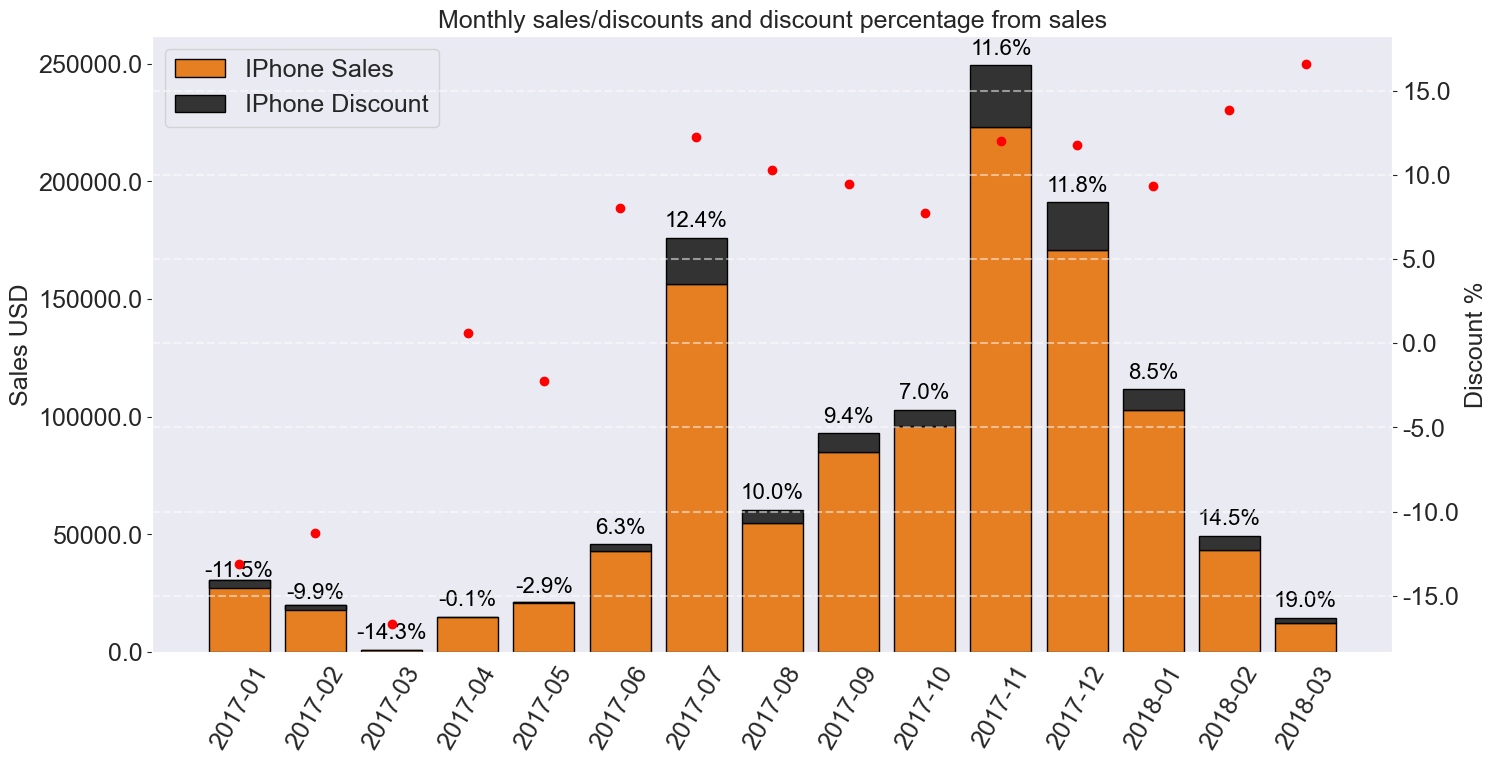

In [ ]:
# Define category labels and values
categories = [top_10.index[0]]
months = monthly_sales_df["year_month"].unique()
colors = sns.color_palette("pastel", n_colors=len(categories))
size_font = 18
size_font_percentage = 16

# Create a stacked bar chart
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bottom array to keep track of where each segment starts
bottom = np.zeros(len(months))

# Loop through each category and add a segment to the bar
# Define specific colors for sales and discounts
sales_color = '#E67E22'
discount_color = '#333333'  # Custom color for discounts

for idx, category in enumerate(categories):
    monthly_category_sales = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["unit_price"]
    monthly_category_discount = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["discount"]

    # Calculate the percentage of the discount from the sales
    discount_percentage = (monthly_category_discount / monthly_category_sales) * 100

    ax1.bar(months, monthly_category_sales, label=f"{category} Sales", bottom=bottom, color=sales_color, edgecolor='black')
    bottom += monthly_category_sales.values  # Update bottom position for next segment

    ax1.bar(months, monthly_category_discount, label=f"{category} Discount", bottom=bottom, color=discount_color, edgecolor='black')
    bottom += monthly_category_discount.values  # Update bottom position for next segment

    # Plot the discount percentage above each bar
    for i, (sales, discount, percentage) in enumerate(zip(monthly_category_sales, monthly_category_discount, discount_percentage)):
        ax1.text(i, bottom[i] + 3000, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=size_font_percentage, color='black')
        # Add labels and title
        ax1.set_xlabel("", fontsize=size_font)
        ax1.set_xticks(months)
        ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font);
        ax1.set_xticklabels(months, rotation=60, fontsize=size_font)
        ax1.set_ylabel("Sales USD", fontsize=size_font)
        ax1.set_title("Monthly sales/discounts and discount percentage from sales", fontsize=size_font)
        ax1.legend(title="", loc='upper left', fontsize=size_font)

        # Set darker background
        # ax1.set_facecolor('#EAEAF2')
        # fig.patch.set_facecolor('#EAEAF2')
        sns.set_style("dark")

# Create a second y-axis to plot the discount percentage
discount_percentage_mean = monthly_sales_df[monthly_sales_df["product_category"] == category].set_index("year_month").reindex(months, fill_value=0)["discount %"]
ax2 = ax1.twinx()
ax2.scatter(months, discount_percentage_mean, color='r', marker='o', label='Discount percentage from base price')
ax2.set_ylabel('Discount %', fontsize=size_font)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=size_font);
ax2.grid(axis="y", linestyle="--", alpha=0.5, linewidth=1.5);
# ax2.legend(loc='upper right', fontsize=size_font)

# Display full float values on the y axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.show()

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3579836251.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font)
/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7870/3579836251.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=size_font, color='r')


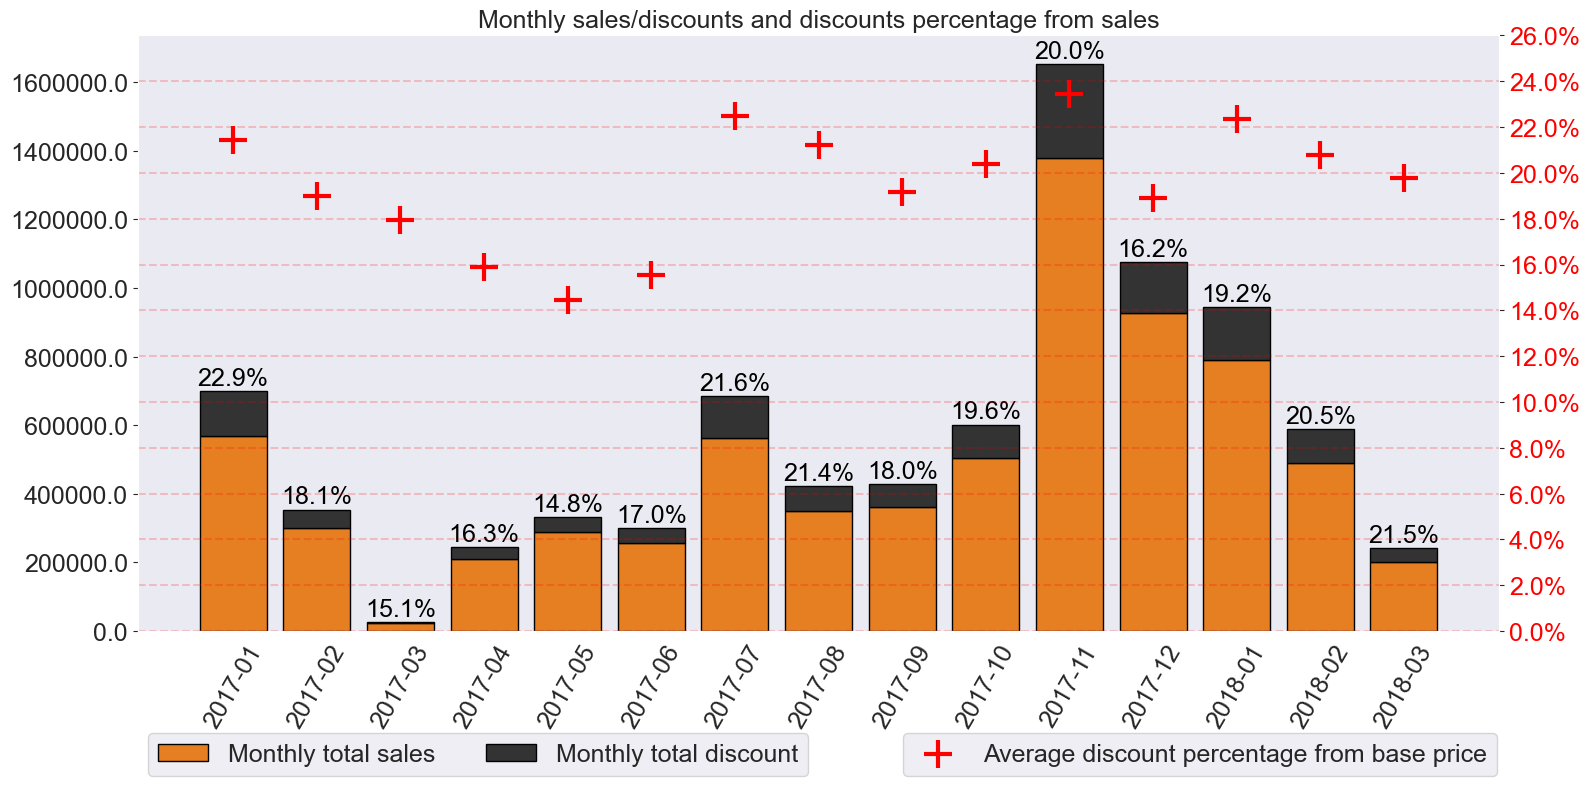

In [ ]:
# Define category labels and values
# categories = [top_10.index[0]]
months = monthly_sales_df["year_month"].unique()
colors = sns.color_palette("pastel", n_colors=len(categories))
size_font = 18
size_font_percentage = 18

# Create a stacked bar chart
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bottom array to keep track of where each segment starts
bottom = np.zeros(len(months))

# Loop through each category and add a segment to the bar
# Define specific colors for sales and discounts
sales_color = '#E67E22'
discount_color = '#333333'  # Custom color for discounts

# Combine all categories
monthly_sales_combined = monthly_sales_df.groupby("year_month").agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum", "price": "sum", "discount %" : "mean"})

# Plot sales
ax1.bar(months, monthly_sales_combined["unit_price"], label="Monthly total sales", color=sales_color, edgecolor='black')

# Plot discounts
ax1.bar(months, monthly_sales_combined["discount"], label="Monthly total discount", bottom=monthly_sales_combined["unit_price"], color=discount_color, edgecolor='black')

# Calculate the percentage of the discount from the sales
discount_percentage_combined = (monthly_sales_combined["discount"] / monthly_sales_combined["unit_price"]) * 100

# Plot the discount percentage above each bar
for i, (sales, discount, percentage) in enumerate(zip(monthly_sales_combined["unit_price"], monthly_sales_combined["discount"], discount_percentage_combined)):
    ax1.text(i, sales + discount + 3000, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=size_font_percentage, color='black')

# Add labels and title
ax1.set_xlabel("", fontsize=size_font)
ax1.set_xticks(months)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font)
ax1.set_xticklabels(months, rotation=60, fontsize=size_font)
ax1.set_ylabel("", fontsize=size_font)
ax1.set_title("Monthly sales/discounts and discounts percentage from sales", fontsize=size_font)
ax1.legend(title="", loc='upper center', fontsize=size_font, bbox_to_anchor=(0.25, -0.15), ncol=2)

# Set darker background
sns.set_style("dark")

# Create a second y-axis to plot the discount percentage
discount_percentage_mean = monthly_sales_combined["discount %"]
ax2 = ax1.twinx()
ax2.scatter(months, discount_percentage_mean, color='r', marker='+', label='Average discount percentage from base price', s=400, linewidths=3)
ax2.set_ylabel('', fontsize=size_font)
ax2.set_ylim(0, 26)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=size_font, color='r')
ax2.grid(axis="y", linestyle="--", alpha=0.2, linewidth=1.5, color='r')
ax2.legend(title="", loc='upper center', fontsize=size_font, bbox_to_anchor=(0.78, -0.15), ncol=1)

# Set precise ticks
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))
ax2.yaxis.set_major_locator(plt.MultipleLocator(2.0))


# Display full float values on the y axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()
plt.savefig('./plots/Monthly_sales_discounts' + '.png')
plt.show()